<a href="https://colab.research.google.com/github/LilianYou/Sea_Hero_Quest/blob/main/Detecting_Latent_Factors_in_Demographic_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## read data

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#df_raw = pd.read_csv('/content/drive/My Drive/SHQ/Data/2019_cleaned_demographics.csv')

df_raw = pd.read_csv('/content/drive/My Drive/SHQ/Data/2019_cleaned_demographics_3121970.csv')

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771628 entries, 0 to 771627
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                771628 non-null  float64
 1   education          771628 non-null  int64  
 2   gender             771628 non-null  int64  
 3   hand               771628 non-null  int64  
 4   home_environment   771628 non-null  int64  
 5   navigating_skills  771628 non-null  object 
 6   sleep              771628 non-null  float64
 7   travel_time        771628 non-null  int64  
 8   nav_num            771628 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 53.0+ MB


In [4]:
df_raw.describe()

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num
count,771628.000000,771628.000000,771628.000000,771628.000000,771628.000000,771628.000000,771628.000000,771628.000000
mean,38.610113,0.717698,0.524158,0.099046,1.134715,6.986715,0.853479,2.161831
std,14.548005,0.450120,0.499416,0.298725,0.678275,1.197783,0.794526,0.700436
min,19.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,2.000000
50%,36.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,2.000000
75%,50.000000,1.000000,1.000000,0.000000,2.000000,8.000000,2.000000,3.000000
max,70.000000,1.000000,1.000000,1.000000,2.000000,12.000000,2.000000,3.000000


In [5]:
df = df_raw.copy()

#Step 1. Bivariate Correlation

In [6]:
df

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time,nav_num
0,68.0,1,0,0,2,bad,8.0,0,1
1,21.0,1,0,0,1,good,7.0,1,2
2,36.0,1,1,0,0,very-good,5.0,1,3
3,19.0,0,1,0,1,good,8.0,0,2
4,61.0,1,1,0,1,good,7.0,0,2
...,...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,good,6.0,2,2
771624,68.0,1,1,0,2,good,8.0,1,2
771625,59.0,0,0,0,2,very-good,7.0,0,3
771626,48.0,1,1,0,1,good,6.0,2,2


In [7]:
df_model = df.copy()

In [8]:
df_model = df_model.drop(['navigating_skills'], axis= 1)
df_model

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num
0,68.0,1,0,0,2,8.0,0,1
1,21.0,1,0,0,1,7.0,1,2
2,36.0,1,1,0,0,5.0,1,3
3,19.0,0,1,0,1,8.0,0,2
4,61.0,1,1,0,1,7.0,0,2
...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,6.0,2,2
771624,68.0,1,1,0,2,8.0,1,2
771625,59.0,0,0,0,2,7.0,0,3
771626,48.0,1,1,0,1,6.0,2,2


In [9]:
df_model.corr(method= 'spearman')

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num
age,1.000000,-0.023733,-0.055903,-0.012966,-0.052783,-0.120057,-0.146072,0.024131
education,-0.023733,1.000000,-0.008282,-0.006270,0.020896,-0.018880,0.007738,0.022951
gender,-0.055903,-0.008282,1.000000,0.031291,0.047229,-0.059097,0.111290,0.240194
hand,-0.012966,-0.006270,0.031291,1.000000,-0.016572,0.003371,-0.015410,0.001840
home_environment,-0.052783,0.020896,0.047229,-0.016572,1.000000,0.000591,0.068498,-0.003623
sleep,-0.120057,-0.018880,-0.059097,0.003371,0.000591,1.000000,-0.063806,0.002757
travel_time,-0.146072,0.007738,0.111290,-0.015410,0.068498,-0.063806,1.000000,0.105451
nav_num,0.024131,0.022951,0.240194,0.001840,-0.003623,0.002757,0.105451,1.000000


In [10]:
df_model = df_model.rename(columns = {"age": "age", "gender": "gender", "hand":"handedness", "sleep": "sleep", "education": "education", "travel_time":"daily commute", "home_environment":"environment", "nav_num": "navigation ability"})
df_model

,age,education,gender,handedness,environment,sleep,daily commute,navigation ability
0,68.0,1,0,0,2,8.0,0,1
1,21.0,1,0,0,1,7.0,1,2
2,36.0,1,1,0,0,5.0,1,3
3,19.0,0,1,0,1,8.0,0,2
4,61.0,1,1,0,1,7.0,0,2
...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,6.0,2,2
771624,68.0,1,1,0,2,8.0,1,2
771625,59.0,0,0,0,2,7.0,0,3
771626,48.0,1,1,0,1,6.0,2,2


In [11]:

# reorder columns
df_model = df_model[['age', 'gender', 'education', 'sleep', 'handedness', 'daily commute', 'environment', 'navigation ability']]


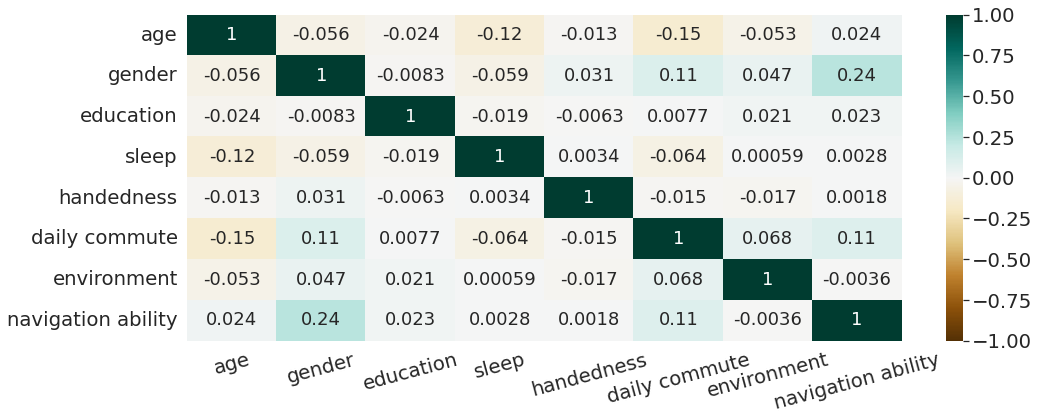

In [13]:
# Increase the size of the heatmap.
title = "correlation_3121970"
sns.set(font_scale=1.8)
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_model.corr('spearman'), vmin=-1, vmax=1, annot=True, annot_kws={"size":18}, cmap='BrBG')
plt.xticks(rotation=15) 
plt.savefig(title + '.pdf', bbox_inches="tight")
plt.savefig(title + '.png', bbox_inches="tight")

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

#Step 2. Evaluate the “factorability” of our dataset.

In [14]:
!pip install factor_analyzer==0.2.3
#!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from factor_analyzer import FactorAnalyzer

In [16]:
# adequacy test
#checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_model)
chi_square_value, p_value

(109858.28728241671, 0.0)

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_model)

kmo_model

0.5080610718228075

In [18]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.fit(df_model4_standardized)
fa.analyze(df_model, 8, rotation=None, method='ml') # 'minres' , 'principal'

eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
#ev, v = fa.get_eigenvalues()
#ev

In [19]:
eigen_values 
# Eigenvalues represent the total amount of variance that can be explained by a given principal component. 
# Eigenvalues are also the sum of squared component loadings across all items for each component, which represent the amount of variance in each item that can be explained by the principal component.

,Original_Eigenvalues
0,1.368439
1,1.138815
2,1.050783
3,0.998971
4,0.979010
5,0.951070
6,0.809532
7,0.703380


Here, you can see only 3-factors eigenvalues are greater than one. It means we need to choose only 3 factors (or unobserved variables).



In [20]:
vectors 
# Eigenvectors represent a weight for each eigenvalue.

,Common_Factor_Eigenvalues
0,0.508751
1,0.249651
2,0.117546
3,0.022162
4,0.017549
5,0.007002
6,-0.065542
7,-0.171955


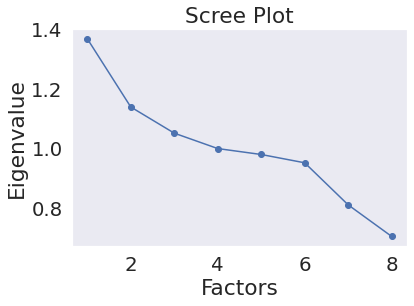

In [21]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_model.shape[1]+1),eigen_values)
plt.plot(range(1,df_model.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#Step 3. Exploratory Factor Analysis (Traditional Approach)

Factor analysis for 3 factors

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.analyze(df_model4_standardized, 3, rotation="varimax")
fa.analyze(df_model, 3, rotation="oblimin", method='ml')
#fa.analyze(df_model4_standardized, 3, rotation="oblimax")
#fa.analyze(df_model4_standardized, 3, rotation="promax")
#fa.analyze(df_model4_standardized, 3, rotation="quartimin")
#fa.analyze(df_model4_standardized, 3, rotation="quartimax")
#fa.analyze(df_model4_standardized, 3, rotation="equamax")

In [ ]:
fa.loadings # The eigenvector times the square root of the eigenvalue gives the 
# component loadings which can be interpreted as the correlation of each item with the principal component.

,Factor1,Factor2,Factor3
age,0.018957,0.639839,-0.030712
gender,0.202499,-0.080337,0.181847
hand,0.002223,-0.023539,-0.010315
nav skills,0.997577,0.003927,-0.000595
sleep,0.048861,-0.312510,-0.293192
edu,0.010248,0.225124,0.132620
commute,0.062557,-0.182779,0.347786
env,-0.016347,-0.076656,0.115028


In [ ]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,1.043204,0.604045,0.271854
Proportion Var,0.130400,0.075506,0.033982
Cumulative Var,0.130400,0.205906,0.239888


The lesser the variance of a latent variable, the better it can be predicted via observable variables.

Total 24.5% cumulative Variance explained by the 3 factors. Low variance explained means that the items qw have are not sufficient to explain the model. We should have additional items, since the once we have produced not enough variance for your dependent variable.

In [ ]:
fa.phi # correlation among factors

array([[ 1.        , -0.00362488,  0.12477274],
       [-0.00362488,  1.        , -0.03334208],
       [ 0.12477274, -0.03334208,  1.        ]])